# Cihan Yatbaz
###  03 / 11 / 2018



1.  [Introduction:](#0)
2. [Exploratory Data Analysis (EDA) :](#1)
3. [K-NEAREST NEIGHBORS ( KNN ) :](#2)
    1. [KNN  :](#3)
    2. [Model Complexity  :](#4)  
4. [REGRESSION :](#5)
5. [Support Vector Machine ( SVM) :](#6)
6. [Naive Bayes :](#7)
7. [Decission Tree :](#8)
8. [Random Forest :](#9)
9. [Confusion Matrix :](#10)
10. [CONCLUSION :](#11)


<a id="0"></a> <br>
# 1) Introduction

We will be working on this kernel Biomechanical features of orthopedic patients data. This kernel will do some inspections with KNN. Firstly we will examine dataset. Let's start 

In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import warnings
#ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf-8"))

# Any results you write to the current directory are saved as output.

column_2C_weka.csv
column_3C_weka.csv



In [27]:
# read csv(comma separated value) into data
data = pd.read_csv("input/column_2C_weka.csv")

In [28]:
data.columns  #Columns in our data 

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

We have Abnormal and Normal values in our data and let's see them now

In [29]:
data.head()

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal

In [30]:
data.tail()

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis   class  
305     34.286877     117.449062                 -4.245395  Normal  
306     33.215251     114.365845                 -0.421010  Normal  
307     38.751628     125.670725                 -2.707880  Normal  
308     36.559635     118.545842                  0.214750  Normal  
309     28.767649     123.945244                 -0.199249  Normal

In [31]:
#Now let's look at the data of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [32]:
data.describe()

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
count        310.000000           310.000000             310.000000   
mean          60.496653            17.542822              51.930930   
std           17.236520            10.008330              18.554064   
min           26.147921            -6.554948              14.000000   
25%           46.430294            10.667069              37.000000   
50%           58.691038            16.357689              49.562398   
75%           72.877696            22.120395              63.000000   
max          129.834041            49.431864             125.742385   

       sacral_slope  pelvic_radius  degree_spondylolisthesis  
count    310.000000     310.000000                310.000000  
mean      42.953831     117.920655                 26.296694  
std       13.423102      13.317377                 37.559027  
min       13.366931      70.082575                -11.058179  
25%       33.347122     110.709196                  1.603727  
50%       42.404912     118.268178                 11.767934  
75%       52.695888     125.467674                 41.287352  
max      121.429566     163.071041                418.543082

<a id="1"></a> <br>
# 2) Exploratory Data Analysis (EDA)

### Scatter Matrix Plot

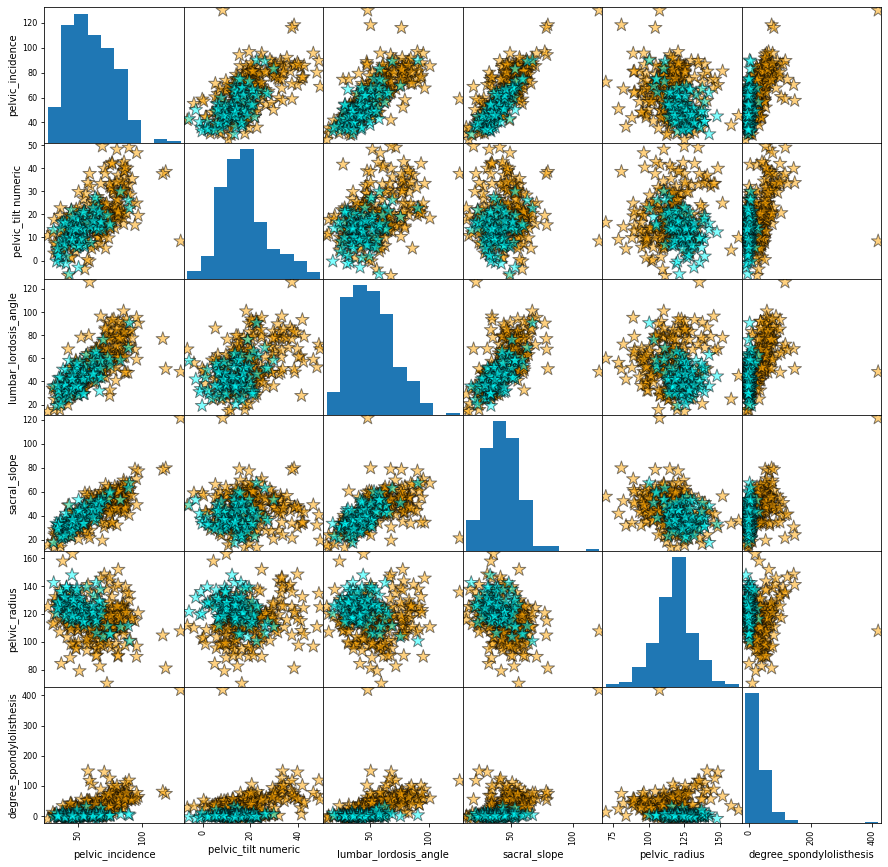

In [33]:
colors = ['cyan' if i == 'Normal' else 'orange' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns !='class'],
                                       c = colors,
                                       figsize =[15,15],
                                       diagonal ='hist',    # histogram of each features
                                       alpha = 0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor="black"
                          )
plt.savefig('graph4.png')
plt.show()

### Count plot
Now let's see how many of our Normal and Abnormal values exist

Abnormal    210
Normal      100
Name: class, dtype: int64

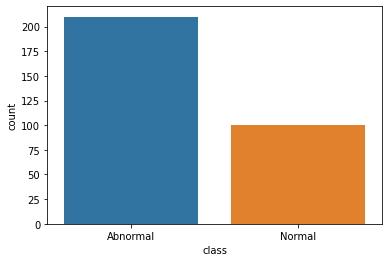

In [34]:
sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()

### Which value belongs to the selected point?

In [35]:
# We list them separately according to 'Abnormal' and 'Normal' properties
N = data[data['class']=="Normal"]
A = data[data['class']=="Abnormal"]
print("NORMAL")
N.info()
print()
print("ABNORMAL")
A.info()

NORMAL
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 210 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          100 non-null    float64
 1   pelvic_tilt numeric       100 non-null    float64
 2   lumbar_lordosis_angle     100 non-null    float64
 3   sacral_slope              100 non-null    float64
 4   pelvic_radius             100 non-null    float64
 5   degree_spondylolisthesis  100 non-null    float64
 6   class                     100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 6.2+ KB

ABNORMAL
<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          210 non-null    float64
 1   pelvic_tilt numeric       210 non-null    float64
 2   l

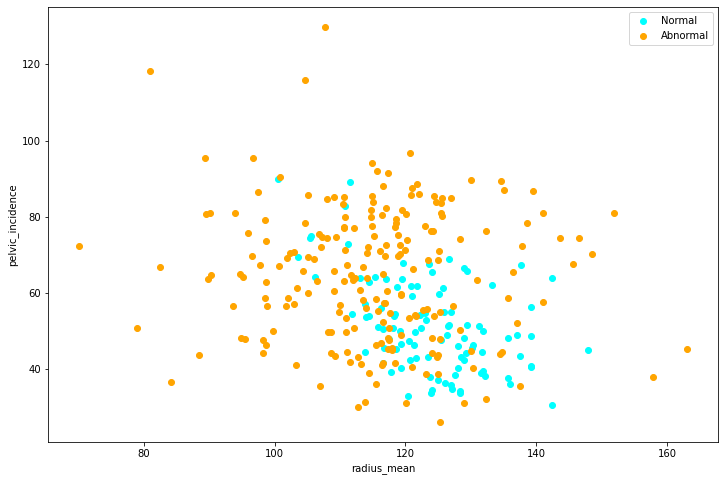

In [36]:
# Scatter Plot
plt.figure(figsize=[12,8])
plt.scatter(N.pelvic_radius, N.pelvic_incidence, color="cyan", label="Normal")
plt.scatter(A.pelvic_radius, A.pelvic_incidence, color="orange", label="Abnormal")
plt.xlabel("radius_mean")
plt.ylabel("pelvic_incidence")
plt.legend() # To show labels
plt.savefig('graph3.png')
plt.show()

### In the figure above, how can we predict whether a point we want to find is Normal or Abnormal? Let's learn together.
* First we set a point.
* Then we choose the value 3 closest to this point.
* If the Abnormal number is higher in these values, it is Abnormal in your new value. If the number of Normals is high, our new value becomes normal.


<a id="2"></a> <br>
# 3) K-NEAREST NEIGHBORS ( KNN )

<a id="3"></a> <br>
## A) KNN

In [37]:
data['class'] = [1 if each=='Normal' else 0 for each in data['class']]
data_class = data['class']   # This is what we do for convenience
y = data_class.values
x_d = data.drop(["class"], axis=1)   # We will use other features except Class

* Now we are doing normalization. Because if some of our columns have very high values, they will suppress other columns and do not show much.
* Formulel : (x- min(x)) / (max(x) - min(x))

In [38]:
# Normalization
x = (x_d - np.min(x_d)) / (np.max(x_d) - np.min(x_d))

* Now we reserve 70% of the values as 'train' and 30% as 'test'.

In [39]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

Let's create our KNN model
* n_neighbours = k  ----->   We determine the k value and try to increase the accuracy of the result

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

In [41]:
print(" {} nn score : {}".format(22, knn.score(x_test, y_test)))

 22 nn score : 0.8172043010752689


### Let's try to find the best k value with loop now

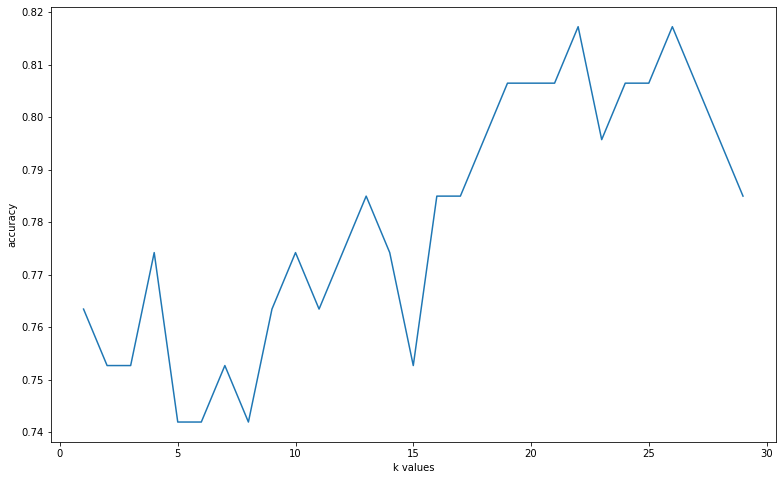

In [42]:
score_list = []
for each in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
#Plot
plt.figure(figsize=[13,8])
plt.plot(range(1,30),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.savefig('graph2.png')
plt.show()

### If k value has a value of 22 or 26, our test results will give the best result.

<a id="4"></a> <br>
## B) Model Complexity
* We can use Model Complexity to find the best value.  This way we can easily find the best result by comparing the Value and Accuracy.

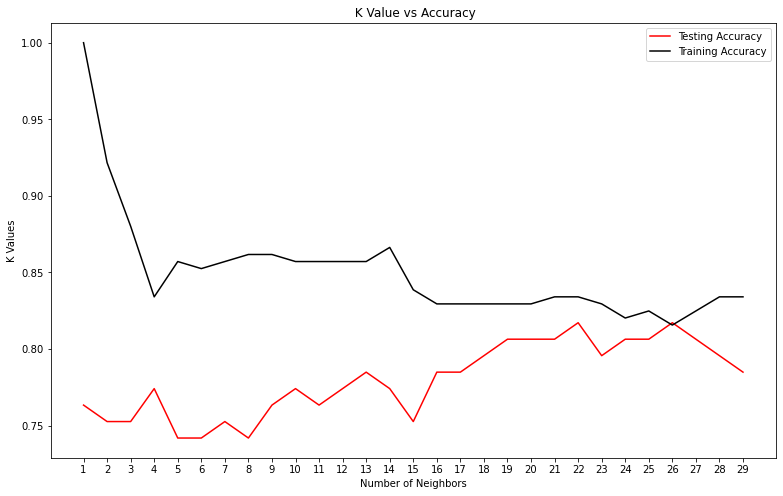

Best accuracy is 0.8172043010752689 with K = 22


In [43]:
# Model complexity
rand = np.arange(1,30)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(rand):
    # k from 1 to 30(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit with knn
    knn.fit(x_train, y_train)
    train_accuracy.append(knn.score(x_train, y_train))           # train accuracy
    test_accuracy.append(knn.score(x_test, y_test))              # test accuracy

# Plot
plt.figure(figsize=[13,8])
plt.plot(rand, test_accuracy, label='Testing Accuracy' , color='red')
plt.plot(rand, train_accuracy, label='Training Accuracy', color='black')
plt.legend()
plt.title(' K Value vs Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('K Values')
plt.xticks(rand)
plt.savefig('graph.png')
plt.show()

print("Best accuracy is {} with K = {}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))

<a id="5"></a> <br>
# 4) REGRESSION 
* Let's create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable

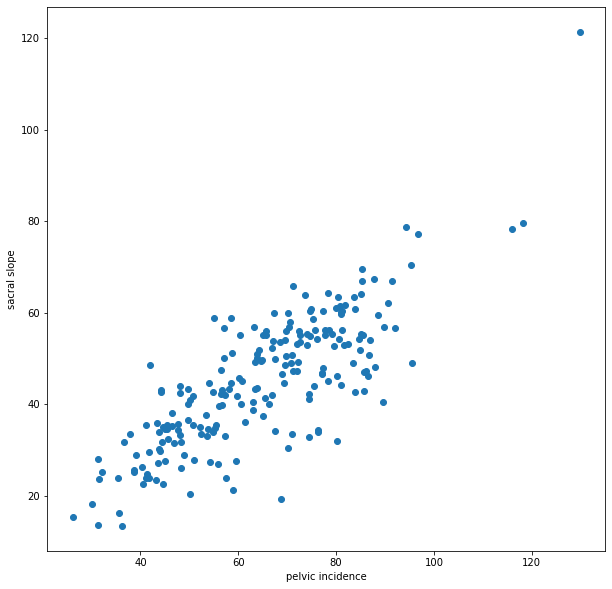

In [44]:
data1 = A  # We have previously defined A to Class Abnormal.
x = np.array(data1.loc[:, 'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:, 'sacral_slope']).reshape(-1,1)

# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x, y=y)
plt.xlabel("pelvic incidence")
plt.ylabel("sacral slope")
plt.show()

R^2 score:  0.6458410481075871
R^2 score metrics:  0.6458410481075871


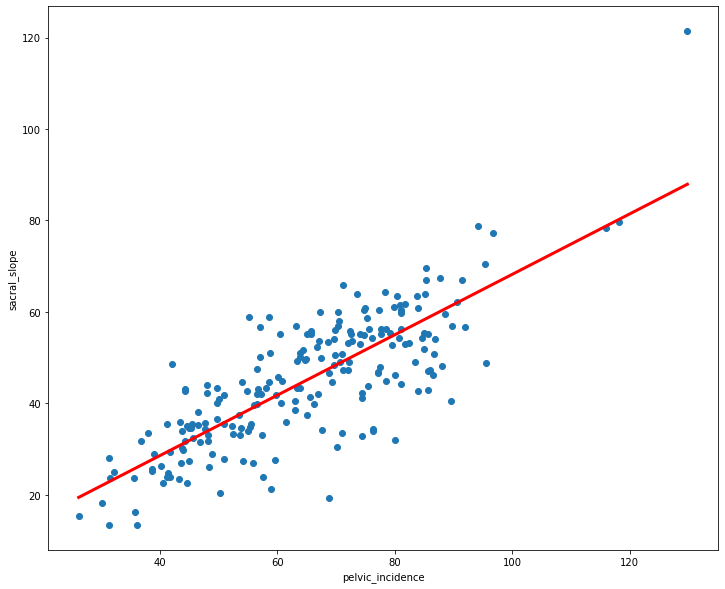

In [45]:
# LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score    
#Regression
reg = LinearRegression()
# Fit
reg.fit(x,y)

# Prediction: 
pred_space = np.linspace(min(x), max(x)).reshape(-1,1)
y_head = reg.predict(pred_space)

# r2 score with LinearRegression
print('R^2 score: ',reg.score(x, y))
# r2 score with metrics
print('R^2 score metrics: ', r2_score(y, reg.predict(x)))

# Plot regression line and scatter
plt.subplots(figsize=(12,10))
plt.plot(pred_space, y_head, color='red', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.savefig('graph6.png')
plt.show()

<a id="6"></a> <br>
# 5) Support Vector Machine ( SVM)
*  Specifies the line that will pass between 2 values in the table and tries to keep margin highest

In [46]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

#test
print("Accuracy of SVM Score : ", svm.score(x_test, y_test))

Accuracy of SVM Score :  0.8064516129032258


<a id="7"></a> <br>
# 6) Naive Bayes
* Determines the probability that the point in the selected circle can be A or B.

In [47]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
#test
print("Accuracy of Naive Score : ", nb.score(x_test, y_test))

Accuracy of Naive Score :  0.8172043010752689


<a id="8"></a> <br>
# 7) Decission Tree
* It allows us to differentiate between different classes with Splits

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
#test
print("Accuracy of Decision Tree Score : ", dtc.score(x_test, y_test))

Accuracy of Decision Tree Score :  0.7741935483870968


<a id="9"></a> <br>
# 8) Random Forest
* We have multiple decision trees in a random forest and Random forest giving us the most correct results by doing the transaction with decision tree while we process.
* As a result, it improves the accuracy and reliability of the model

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, random_state=1)
#n_estimators =100 -> Determines how many trees we have
rfc =rfc.fit(x_train, y_train)
#test
print("Random Forest Score", rfc.score(x_test, y_test))

Random Forest Score 0.8602150537634409


<a id="10"></a> <br>
# 9) Confusion Matrix
* Confusion Matrix : With the result, it shows how many mistakes we have from A and B.
* Confusion Matrix enables us to visualize these results

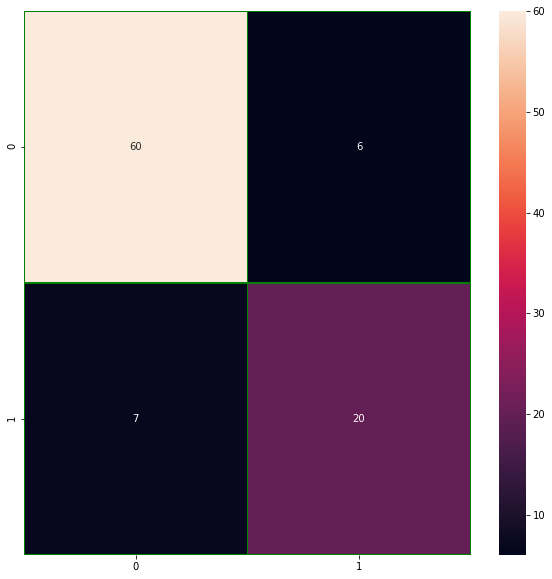

In [50]:
from sklearn.metrics import confusion_matrix
y_pred = rfc.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

# confusion matrix visualization

f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = 'green', fmt=".0f", ax=ax)
plt.savefig('graph7.png')
plt.show()

#### 0 = Abnormal values       &      1 = Normal values
* In our test, there are 60 true, 6 false results for Abnormal.
* In our test, there are 20 true, 7 false results for Normal.

<a id="11"></a> <br>
> # CONCLUSION                                                                                                                                                      
Thank you for your votes and comments                                                                                                                                              
<br>**If you have any suggest, May you write for me, I will be happy to hear it.**